In [1]:
from typing import TypedDict
from langgraph.graph import StateGraph

In [ ]:
# The schema for the information(state) that is shared between nodes in a graph.
class AgentState(TypedDict):
    message: str

In [3]:
# This is supposed to be one node, so it takes an input state and returns an output state
def greeting_node(state: AgentState)-> AgentState: 
    """
    Simple node that adds a greeting message to the state
    """
    state['message'] = f"Hey {state['message']}, how is your day going?"
    return state

In [ ]:
# Building the Graph

# Create stategraph with schema defined
graph = StateGraph(AgentState) 

graph.add_node("greeter", greeting_node) 

graph.set_entry_point("greeter")
graph.set_finish_point("greeter")

app = graph.compile()

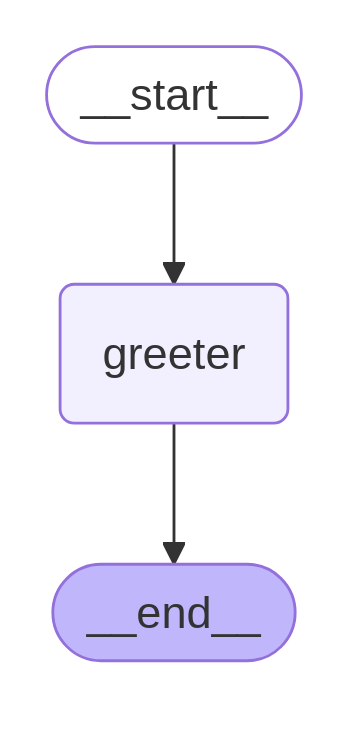

In [26]:
import nest_asyncio
nest_asyncio.apply()

from IPython.display import Image, display
from langchain_core.runnables.graph import MermaidDrawMethod
display(Image(app.get_graph().draw_mermaid_png(draw_method=MermaidDrawMethod.PYPPETEER)))

In [27]:
result = app.invoke({"message":"Bob"})

In [28]:
print(result) # 'result' is a state that has the same schema

{'message': 'Hey Bob, how is your day going?'}


#### Complement Agent - Exercise 1

In [29]:
class ASE1(TypedDict): # Agent State Exercise 1
    message: str

def complement(state: ASE1) -> ASE1:
    state['message'] = f"Hi {state['message']}, keep going! You are doing a great job!"
    return state

In [30]:
graph = StateGraph(ASE1)
graph.add_node("complement", complement)
graph.set_entry_point("complement")
graph.set_finish_point("complement")
app = graph.compile()

In [31]:
result = app.invoke({"message": "Saai"})

In [32]:
print(result)

{'message': 'Hi Saai, keep going! You are doing a great job!'}
